#### Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data =pd.read_csv("spam.csv")
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Cleaning

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data.shape

(5572, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#missing values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# check for duplicate values
data.duplicated().sum()

415

In [8]:
#remove duplicates
data = data.drop_duplicates(keep="first")

In [9]:
# check for duplicate values
data.duplicated().sum()

0

In [10]:
data.shape

(5157, 2)

# label encoder.

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
data['Category']=encoder.fit_transform(data['Category'])
data['Category'].sample(5)

1406    0
995     0
3606    0
74      0
1324    0
Name: Category, dtype: int32

In [12]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis

In [13]:
data["Category"].value_counts()

0    4516
1     641
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x2a75cc98910>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

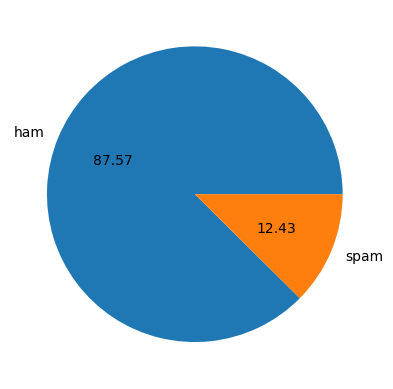

In [14]:
plt.pie(data["Category"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

Now let’s find out :

No. of characters in the data, No. of words in the data, No. of sentences in the data

For a number of characters :

In [15]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data['num_characters']=data['Message'].apply(len)
data.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


For a number of words :

In [17]:
from nltk.tokenize import word_tokenize
data['Message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [18]:
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.sample(5)

,Category,Message,num_characters,num_words
2882,0,Printer is cool. I mean groovy. Wine is groovying,49,11
2698,0,Can you use foreign stamps for whatever you se...,62,13
5040,0,Pls clarify back if an open return ticket that...,98,22
3611,0,"Call me. I m unable to cal. Lets meet bhaskar,...",55,15
3109,0,Hello hun how ru? Its here by the way. Im good...,149,39


For a number of sentences :

In [19]:
data['num_sentences']=data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
data

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


For ‘Ham’ messages:

In [21]:
data[data['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


For ‘Spam’ messages:

In [22]:
data[data['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


 We can clearly see the spam messages are quite longer than the ham messages.

<Axes: xlabel='num_characters', ylabel='Count'>

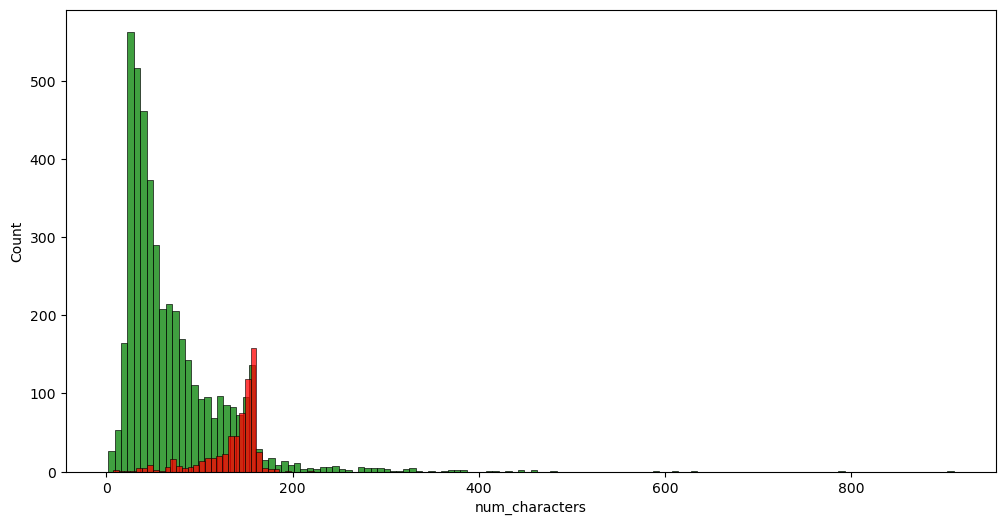

In [23]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category']==0]['num_characters'],color='green')
sns.histplot(data[data['Category']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

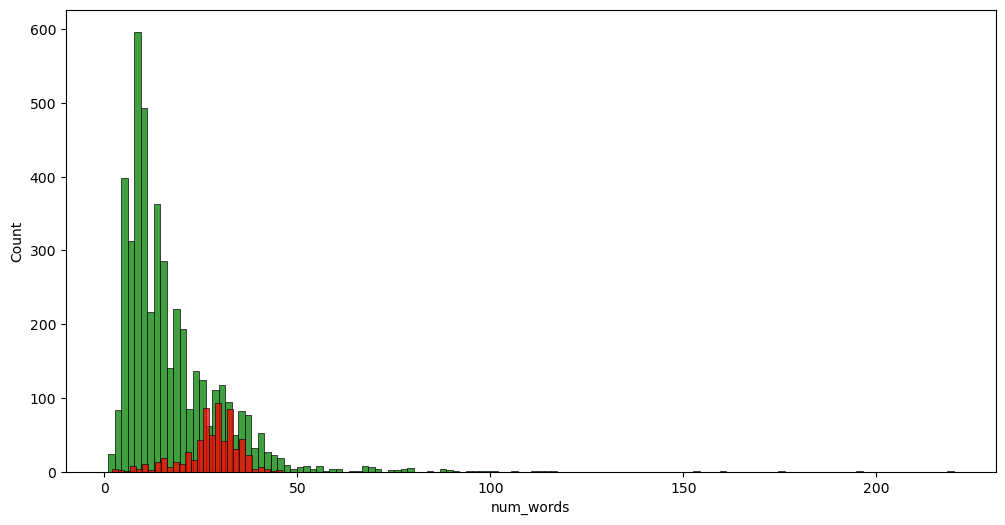

In [24]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category']==0]['num_words'],color='green')
sns.histplot(data[data['Category']==1]['num_words'],color='red')

C:\Users\chaks\AppData\Local\Temp\ipykernel_1832\1222426202.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

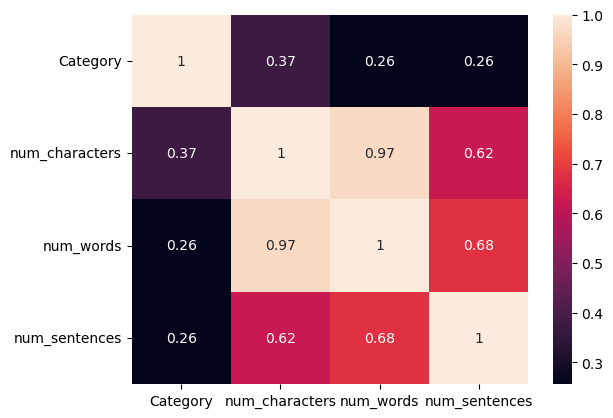

In [25]:
#plotting a heatmap for the correlation
sns.heatmap(data.corr(),annot=True)

In [26]:
# seprating data as texts and label
X= data["Message"]
Y= data["Category"]

In [27]:
print(X)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [28]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32


In [29]:
#splitting Training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [30]:
X.shape,X_train.shape,X_test.shape

((5157,), (4125,), (1032,))

In [31]:
# transform the text data to feature vectors that can be used as input to the logistic regression

feature_extraction = TfidfVectorizer(min_df =1, stop_words ="english" , lowercase= True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [32]:
# convert train and test values as integers
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

### Model Training

In [33]:
model= LogisticRegression()

In [34]:
model.fit(X_train_features,Y_train)

LogisticRegression()

### Model Evaluation

In [35]:
# prediction on training data

pred_train=model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train,pred_train)
print("Accuracy on training data: ",accuracy_train)

Accuracy on training data:  0.961939393939394


In [36]:
# prediction on test data

pred_test=model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test,pred_test)
print("Accuracy on test data: ",accuracy_test)

Accuracy on test data:  0.9544573643410853


#### Predictive System

In [37]:
input = ["Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"]
#convert text data to feature vectors
convert_data = feature_extraction.transform(input)

#making prediction
prediction = model.predict(convert_data)
print(prediction)

if(prediction[0]==0):
    print("Ham mail")
else:
    print("Spam mail")

[1]
Spam mail


In [38]:
input = ["Oops, I'll let you know when my roommate's done"]
#convert text data to feature vectors
convert_data = feature_extraction.transform(input)

#making prediction
prediction = model.predict(convert_data)
print(prediction)

if(prediction[0]==0):
    print("Ham mail")
else:
    print("Spam")

[0]
Ham mail
